# KOSPI200_2011_22 월 기준 시계열 예측하기 (정규화 X)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
import math
from pylab import rcParams

In [2]:
# 그래프 사이즈 지정
rcParams['figure.figsize'] = 15,10

In [3]:
df = pd.read_csv('./final.csv')
df['Date'] = pd.to_datetime(df['Date'])  # datetime으로 변환
df1 = df.set_index('Date')  # Date를 인덱스로 지정
df_y = pd.DataFrame(df1['Close'].resample('BMS').first())  # y: 달의 첫날(BMS)의 종가로 지정
df1 = df1.reset_index()  # 다시 컬럼으로 변환
df_y = df_y.reset_index()
df_y = df_y.iloc[1:, :]  # 11년 1월을 예측할 데이터가 존재하지 않기 때문에 제외

## 시계열 분석 코드 (SARIMAX)

In [4]:
df1 = df.set_index('Date')
df_y1 = df1['Close'].resample('1m').mean()  # 월 평균

# 다음달의 첫 날
# df_y1 = df1['Close'].resample('BMS').first()

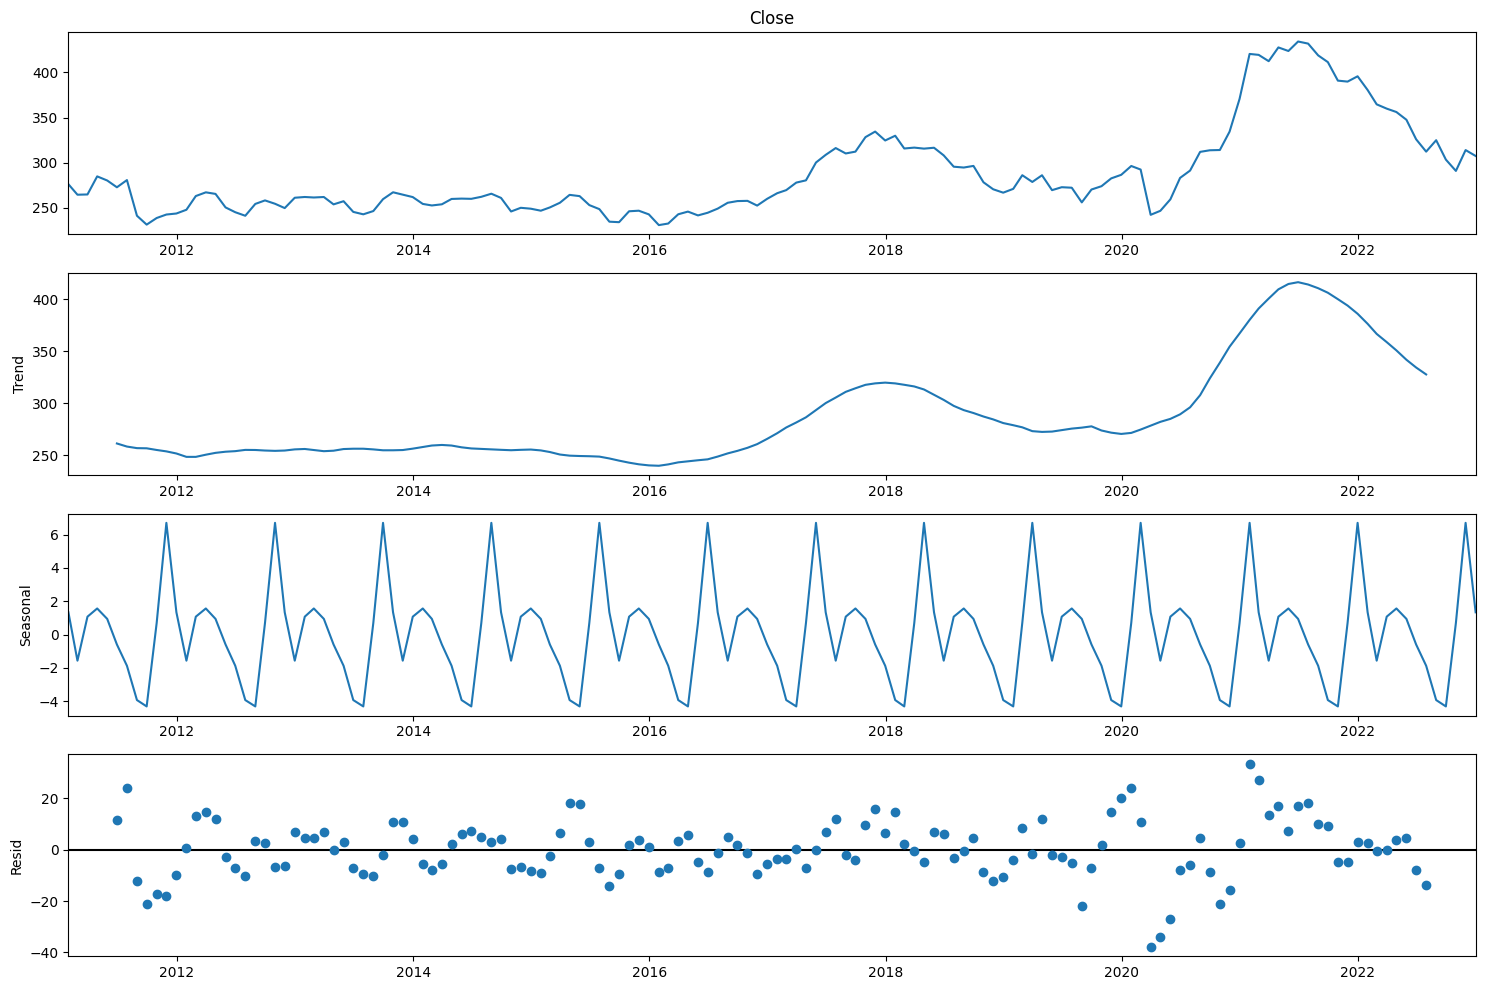

In [5]:
decomposition= sm.tsa.seasonal_decompose(df_y1, period = 11, model='additive')
fig = decomposition.plot()
plt.show()

https://dev.boombear.co.kr/entry/seasonaldecompose-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%ED%95%B4  
https://medium.com/@connect2yh/%EB%8B%A4%EC%A7%9C%EA%B3%A0%EC%A7%9C-%EB%B0%B0%EC%9B%8C%EB%B3%B4%EB%8A%94-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%B6%84%EC%84%9D-%ED%8C%A8%ED%84%B4-%EC%AA%BC%EA%B0%9C%EA%B8%B0-seasonal-decomposition-1%ED%8E%B8-bd9483795960

In [6]:
# ARIMA 모델의 인자(3개) 지정
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [7]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [8]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-p

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-p

In [9]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list, 'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
638,"(2, 1, 2)","(1, 2, 2, 12)",773.291492
467,"(1, 2, 2)","(0, 2, 2, 12)",774.926692
224,"(0, 2, 2)","(0, 2, 2, 12)",775.056137
710,"(2, 2, 2)","(0, 2, 2, 12)",776.556937
476,"(1, 2, 2)","(1, 2, 2, 12)",776.923972
...,...,...,...
28,"(0, 0, 1)","(0, 0, 1, 12)",1541.424365
54,"(0, 0, 2)","(0, 0, 0, 12)",1659.795937
1,"(0, 0, 0)","(0, 0, 1, 12)",1725.364353
27,"(0, 0, 1)","(0, 0, 0, 12)",1828.540356


In [10]:
mod = sm.tsa.statespace.SARIMAX(df_y1,
                                 order=(2, 1, 2),
                                 seasonal_order=(1, 2, 2, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 2, 2, 12)   Log Likelihood                -378.646
Date:                            Sun, 05 Mar 2023   AIC                            773.291
Time:                                    17:25:54   BIC                            793.466
Sample:                                01-31-2011   HQIC                           781.434
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9786      0.025     79.273      0.000       1.930       2.027
ar.L2         -1.0010      0.023   

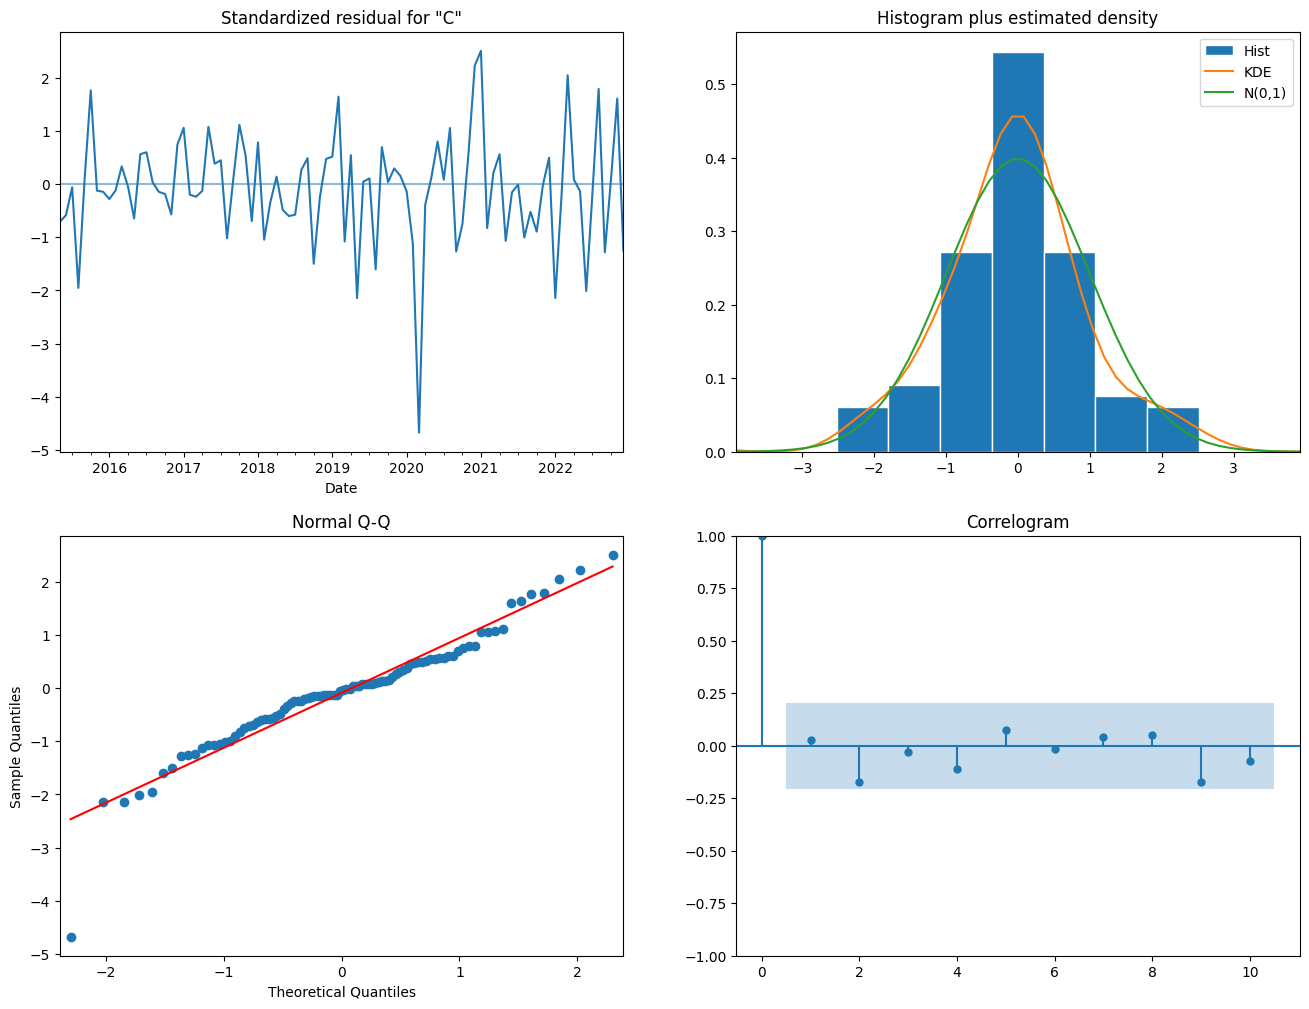

In [11]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

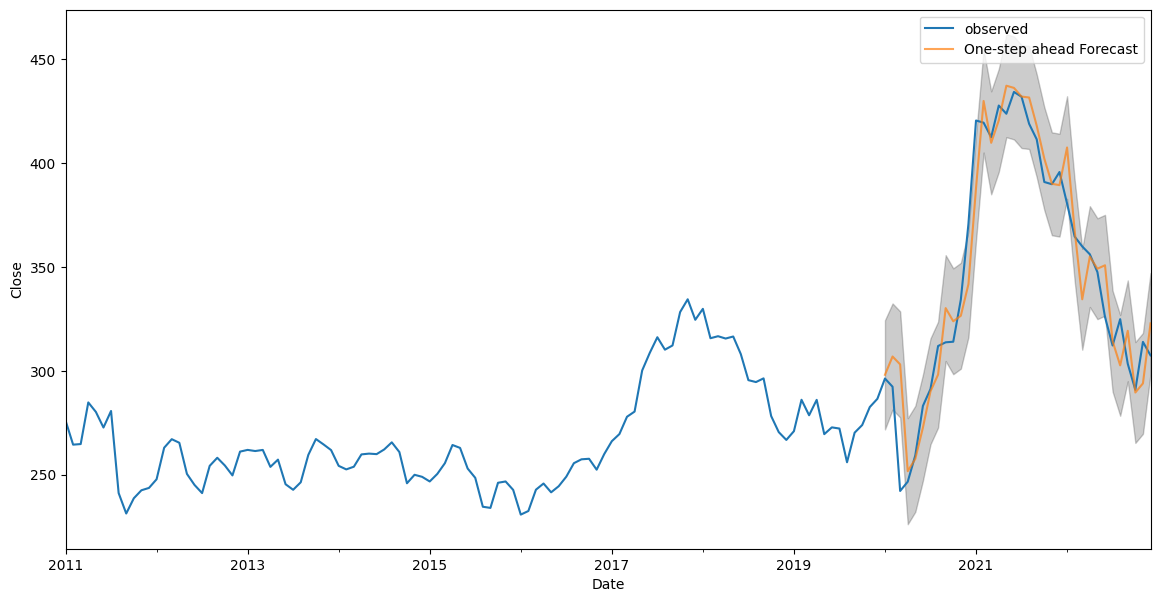

In [12]:
# 갖고 있는 데이터로 2020-01-31부터 2022-12-31까지 예측한 결과와 실제값 동시에 시각화
pred = results.get_prediction(start=pd.to_datetime('2020-01-31'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = df_y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [13]:
y_forecasted = pred.predicted_mean
y_truth = df_y1['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

# MSE가 낮을 수록 좋음 (예측값과 실제값의 차이가 적다)

MSE 297.79


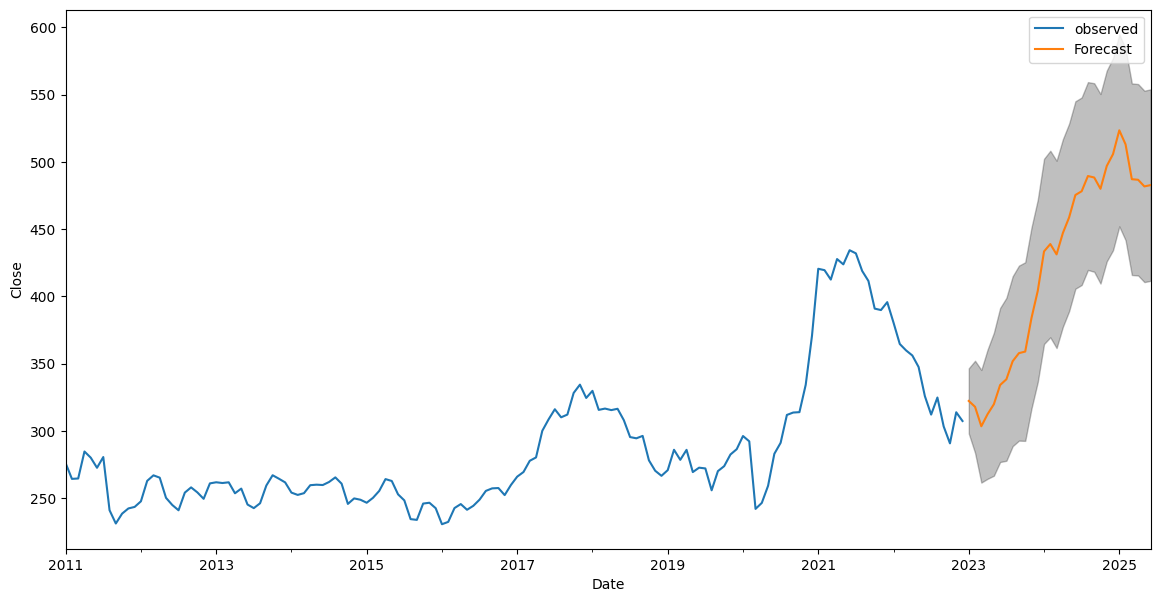

In [14]:
# 갖고 있는 데이터로 미래 예측
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = df_y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

https://ehfgk78.github.io/2018/01/21/DataScience07TimeSeriesData01/#heading-3-arima-%EB%AA%A8%ED%98%95--box-jenkins-approach--%EC%A0%81%EC%9A%A9

## LSTM 준비용 코드

In [15]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [16]:
# 정규화
# scaler = StandardScaler()
# df1[['Close']] = scaler.fit_transform(df1[['Close']])

In [17]:
df1 = df1.reset_index()

In [18]:
x_list = []

In [19]:
# 모델을 만드는 목적: 전 월의 Close로 다음 월 첫 날의 Close를 예측한다.

# 모델 학습에 필요한 데이터 정제
# 매 월 15일간(15일~30일)의 데이터를 묶어준다. -> 묶어준 데이터들을 x_list에 넣어준다.
for i in range(2011, 2023):
    for j in range(1, 13):
        if j < 9:
            cond = (df1['Date'] >= (str(i) + '-' + str(0) + str(j))) & (
                        df1['Date'] < (str(i) + '-' + str(0) + str(j + 1)))
            x_list.append(df1.loc[cond]['Close'].values[-15:])
        elif j == 9:
            cond = (df1['Date'] >= (str(i) + '-' + str(0) + str(j))) & (df1['Date'] < (str(i) + '-' + str(j + 1)))
            x_list.append(df1.loc[cond]['Close'].values[-15:])
        elif j == 12:
            cond = (df1['Date'] >= (str(i) + '-' + str(j))) & (df1['Date'] < (str(i + 1) + '-' + str(0) + str(1)))
            x_list.append(df1.loc[cond]['Close'].values[-15:])
        else:
            cond = (df1['Date'] >= (str(i) + '-' + str(j))) & (df1['Date'] < (str(i) + '-' + str(j + 1)))
            x_list.append(df1.loc[cond]['Close'].values[-15:])

In [20]:
# x_list를 넘파이 배열로 변환
X = np.array(x_list)

In [21]:
X

array([[275.1 , 276.17, 275.52, ..., 279.2 , 278.45, 273.12],
       [273.16, 269.9 , 264.57, ..., 257.69, 259.28, 256.36],
       [256.83, 260.69, 254.29, ..., 274.22, 277.04, 278.87],
       ...,
       [284.96, 287.09, 282.57, ..., 298.82, 295.06, 299.58],
       [311.13, 323.09, 321.53, ..., 312.21, 315.58, 321.  ],
       [311.63, 309.64, 309.56, ..., 304.22, 297.09, 291.1 ]])

In [22]:
# 정규화
# scaler = StandardScaler()
# df_y[['Close']] = scaler.fit_transform(df_y[['Close']])

In [23]:
y_list = []

In [24]:
# 매 월 첫 날의 데이터들을 y_list에 넣어준다.
for i in range(len(df_y['Close'].tolist())) :
    y_list.append(np.array([df_y['Close'].tolist()[i]]))

In [25]:
y_list

[array([273.45]),
 array([254.96]),
 array([280.73]),
 array([295.35]),
 array([282.75]),
 array([278.77]),
 array([282.36]),
 array([242.37]),
 array([221.93]),
 array([249.92]),
 array([251.52]),
 array([238.7]),
 array([257.06]),
 array([267.45]),
 array([268.99]),
 array([266.61]),
 array([242.98]),
 array([244.46]),
 array([249.6]),
 array([251.23]),
 array([262.48]),
 array([247.83]),
 array([255.57]),
 array([269.16]),
 array([257.64]),
 array([266.14]),
 array([262.27]),
 array([254.92]),
 array([260.29]),
 array([241.05]),
 array([248.89]),
 array([251.13]),
 array([261.48]),
 array([268.63]),
 array([267.58]),
 array([257.64]),
 array([250.01]),
 array([256.29]),
 array([258.95]),
 array([255.07]),
 array([261.4]),
 array([259.74]),
 array([268.56]),
 array([265.27]),
 array([252.81]),
 array([248.69]),
 array([251.59]),
 array([244.79]),
 array([250.61]),
 array([253.65]),
 array([254.97]),
 array([267.33]),
 array([258.74]),
 array([255.07]),
 array([241.48]),
 array([229.5

In [26]:
# y_list를 넘파이 배열로 변환
y = np.array(y_list)

## LSTM

In [27]:
from sklearn.model_selection import train_test_split
from keras import models, layers, callbacks

In [28]:
# X2 = X1[:-1, :, :]
X1 = X[:-1]
# y에 2023년 1월 첫 날의 데이터가 없어서 x에서 2022년 12월 데이터를 삭제한 것이다.

In [29]:
# train_test_split: 데이터(시계열의 순서) 섞어주기
# 섞어주는 이유는 모델의 성능을 높이기 위해서
# 왜 시계열의 순서를 섞어줘야 되냐? 안 섞으면 원래 데이터랑 똑같잖아 그래서 새로운 데이터가 들어왔을 때 예측을 못하는 거지
# 그래서 섞어주면 모델의 성능이 높아진다는 말이야 (= 학습 데이터에 덜 맞추되 새로운 데이터에 덜 틀린다.)

# train과 test 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 42)

# random_state: 조건 맞춰주기
# 모든 학생들에게 같은 시험지를 주는 것과 같음 = 여기선 42 시험지

### 데이터 설명
- 전체 데이터: 143개
    - X의 갯수: (1, 2, 3, ..., 15) 이게 143개
    - y의 갯수: ((1), (2), ..., (143)) 이렇게 143개
  
**결론**  
- train : test = 8 : 2 (정확히 이 비율은 아님)
- 총 143개니까 107 : 36 으로 train과 test 데이터를 나누었다.

In [30]:
print(len(X_train), len(X_test))

107 36


In [31]:
x = layers.Input(shape=(X_train.shape[1], 1))
lstm = layers.LSTM(64)(x)
dense = layers.Dense(32)(lstm)
norm = layers.BatchNormalization()(dense)
relu = layers.ReLU()(norm)
y = layers.Dense(1)(relu)
model = models.Model(x, y)

model.compile('adam', 'mean_squared_error')  # loss function: mean_squared_error 사용

In [32]:
# EarlyStopping: val_loss가 제일 낮아도 Epoch 70번은 더 해봐라
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=70)

In [33]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 1000, validation_data = [X_test, y_test], batch_size = 16, verbose = 1, callbacks = es)

Epoch 1/1000
7/7 [==============================] - 4s 147ms/step - loss: 85851.1406 - val_loss: 82599.7969
Epoch 2/1000
7/7 [==============================] - 0s 19ms/step - loss: 85651.8047 - val_loss: 82516.5625
Epoch 3/1000
7/7 [==============================] - 0s 23ms/step - loss: 85526.6328 - val_loss: 82472.2891
Epoch 4/1000
7/7 [==============================] - 0s 20ms/step - loss: 85400.9688 - val_loss: 82444.2812
Epoch 5/1000
7/7 [==============================] - 0s 19ms/step - loss: 85273.4453 - val_loss: 82419.5859
Epoch 6/1000
7/7 [==============================] - 0s 17ms/step - loss: 85139.6953 - val_loss: 82352.9062
Epoch 7/1000
7/7 [==============================] - 0s 17ms/step - loss: 85030.7812 - val_loss: 82268.8594
Epoch 8/1000
7/7 [==============================] - 0s 17ms/step - loss: 84920.2734 - val_loss: 82191.5312
Epoch 9/1000
7/7 [==============================] - 0s 20ms/step - loss: 84823.6562 - val_loss: 82129.9453
Epoch 10/1000
7/7 [=================

Epoch 77/1000
7/7 [==============================] - 0s 29ms/step - loss: 76246.3438 - val_loss: 78036.5938
Epoch 78/1000
7/7 [==============================] - 0s 35ms/step - loss: 75956.3359 - val_loss: 77554.8750
Epoch 79/1000
7/7 [==============================] - 0s 61ms/step - loss: 75425.7266 - val_loss: 77762.9688
Epoch 80/1000
7/7 [==============================] - 0s 38ms/step - loss: 75174.3828 - val_loss: 76154.0547
Epoch 81/1000
7/7 [==============================] - 0s 51ms/step - loss: 74796.2734 - val_loss: 71788.2891
Epoch 82/1000
7/7 [==============================] - 0s 49ms/step - loss: 74626.6484 - val_loss: 74660.3594
Epoch 83/1000
7/7 [==============================] - 0s 34ms/step - loss: 74396.4609 - val_loss: 74145.4453
Epoch 84/1000
7/7 [==============================] - 0s 28ms/step - loss: 74121.1250 - val_loss: 73598.3359
Epoch 85/1000
7/7 [==============================] - 0s 31ms/step - loss: 73749.0938 - val_loss: 75007.5000
Epoch 86/1000
7/7 [=========

7/7 [==============================] - 0s 36ms/step - loss: 21215.6289 - val_loss: 22980.1133
Epoch 228/1000
7/7 [==============================] - 0s 26ms/step - loss: 20481.6992 - val_loss: 25632.2539
Epoch 229/1000
7/7 [==============================] - 0s 37ms/step - loss: 21070.5723 - val_loss: 20548.1113
Epoch 230/1000
7/7 [==============================] - 0s 28ms/step - loss: 20975.8730 - val_loss: 12010.2188
Epoch 231/1000
7/7 [==============================] - 0s 22ms/step - loss: 21708.4141 - val_loss: 13357.3506
Epoch 232/1000
7/7 [==============================] - 0s 20ms/step - loss: 20216.4766 - val_loss: 19045.0977
Epoch 233/1000
7/7 [==============================] - 0s 33ms/step - loss: 19306.4902 - val_loss: 27552.1992
Epoch 234/1000
7/7 [==============================] - 0s 27ms/step - loss: 19136.1855 - val_loss: 29410.0977
Epoch 235/1000
7/7 [==============================] - 0s 24ms/step - loss: 18235.6777 - val_loss: 29327.4102
Epoch 236/1000
7/7 [==============

Epoch 303/1000
7/7 [==============================] - 0s 17ms/step - loss: 5699.9136 - val_loss: 6203.7900
Epoch 304/1000
7/7 [==============================] - 0s 18ms/step - loss: 5602.6641 - val_loss: 5247.8125
Epoch 305/1000
7/7 [==============================] - 0s 15ms/step - loss: 5736.3262 - val_loss: 4068.7217
Epoch 306/1000
7/7 [==============================] - 0s 18ms/step - loss: 5231.5708 - val_loss: 4014.2131
Epoch 307/1000
7/7 [==============================] - 0s 15ms/step - loss: 5391.2979 - val_loss: 4014.5222
Epoch 308/1000
7/7 [==============================] - 0s 14ms/step - loss: 5046.2671 - val_loss: 4778.7251
Epoch 309/1000
7/7 [==============================] - 0s 15ms/step - loss: 4905.0117 - val_loss: 4978.7803
Epoch 310/1000
7/7 [==============================] - 0s 14ms/step - loss: 5172.2852 - val_loss: 4470.5581
Epoch 311/1000
7/7 [==============================] - 0s 15ms/step - loss: 4712.4517 - val_loss: 3597.1494
Epoch 312/1000
7/7 [=================

7/7 [==============================] - 0s 15ms/step - loss: 1090.3329 - val_loss: 215.3670
Epoch 457/1000
7/7 [==============================] - 0s 17ms/step - loss: 651.9496 - val_loss: 231.8229
Epoch 458/1000
7/7 [==============================] - 0s 15ms/step - loss: 1226.8168 - val_loss: 598.1023
Epoch 459/1000
7/7 [==============================] - 0s 14ms/step - loss: 848.7864 - val_loss: 642.6905
Epoch 460/1000
7/7 [==============================] - 0s 14ms/step - loss: 337.6594 - val_loss: 1102.5830
Epoch 461/1000
7/7 [==============================] - 0s 15ms/step - loss: 438.1377 - val_loss: 951.0384
Epoch 462/1000
7/7 [==============================] - 0s 15ms/step - loss: 452.5606 - val_loss: 1327.5402
Epoch 463/1000
7/7 [==============================] - 0s 14ms/step - loss: 1296.0631 - val_loss: 2305.7698
Epoch 464/1000
7/7 [==============================] - 0s 14ms/step - loss: 818.1590 - val_loss: 2266.3303
Epoch 465/1000
7/7 [==============================] - 0s 16ms/s

Epoch 534/1000
7/7 [==============================] - 0s 15ms/step - loss: 515.3477 - val_loss: 2233.9624
Epoch 535/1000
7/7 [==============================] - 0s 16ms/step - loss: 664.2458 - val_loss: 2298.6223
Epoch 536/1000
7/7 [==============================] - 0s 17ms/step - loss: 768.9880 - val_loss: 1872.9872
Epoch 537/1000
7/7 [==============================] - 0s 16ms/step - loss: 612.5118 - val_loss: 1677.7505
Epoch 538/1000
7/7 [==============================] - 0s 15ms/step - loss: 723.9404 - val_loss: 1156.0536
Epoch 539/1000
7/7 [==============================] - 0s 15ms/step - loss: 669.9062 - val_loss: 208.2972
Epoch 540/1000
7/7 [==============================] - 0s 14ms/step - loss: 280.0406 - val_loss: 466.7929
Epoch 541/1000
7/7 [==============================] - 0s 14ms/step - loss: 573.3010 - val_loss: 98.4333


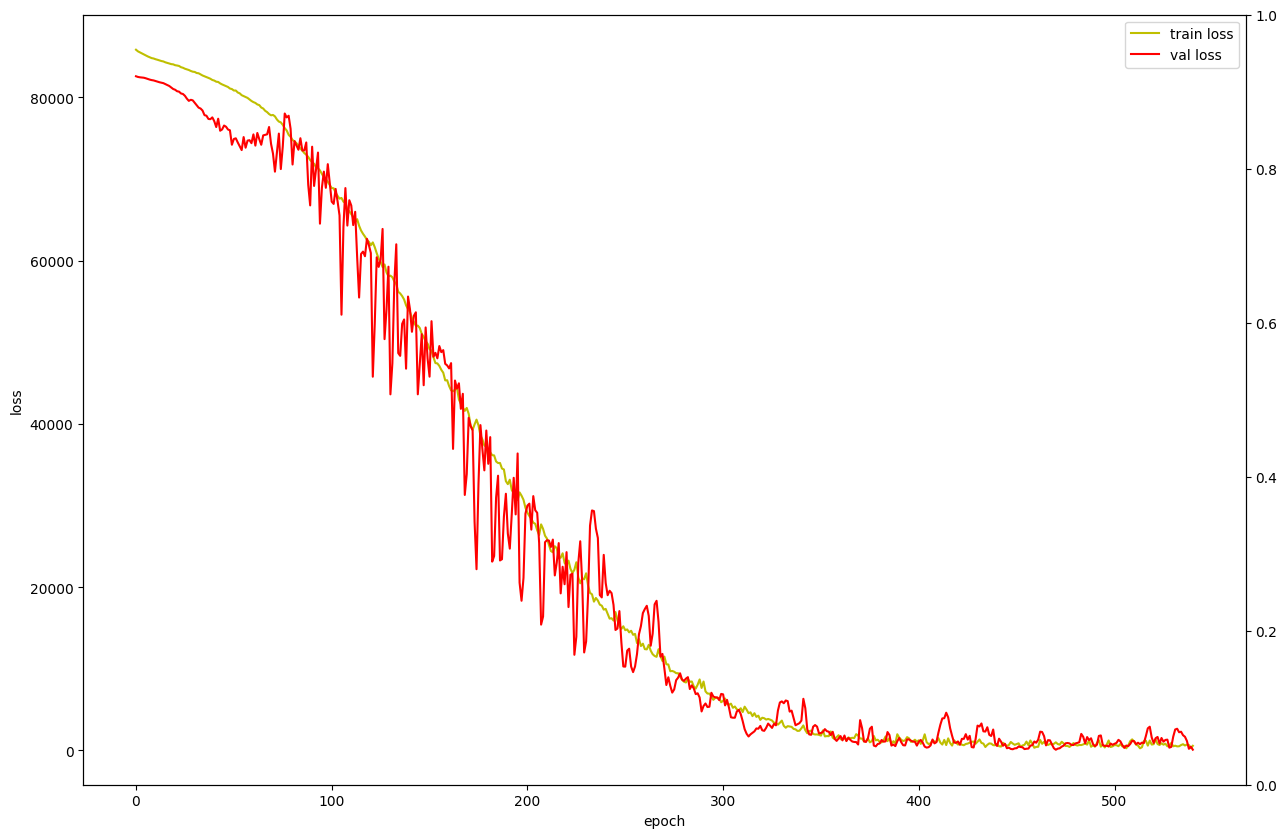

In [58]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.legend()
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

### loss, val_loss 직관적?으로 계산하는 법  
val_loss: a sum of the errors for each example in the validation set  
  
train -> loss / test -> val_loss   
  
**결론**  
위의 코드를 보았을 때 마지막 val_loss가 144.6이다. test 데이터의 총 loss값의 합이 144.6라는 의미이다.  
여기서 test 데이터는 36이다. 그래서 144.6/36 = 약 4
그럼 잔차의 제곱값이 4인 거니까 사실상 예측값에서 +-2이라고 보면 된다.

## 결정 계수(r2_score)
생성한 모델이 얼마나 데이터를 잘 설명하는가?

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
# X 입력 -> 모델을 거쳐서 -> y 출력
y_train_predict = model.predict(X_train)

4/4 [==============================] - 1s 7ms/step


In [36]:
print(r2_score(y_train, y_train_predict))

0.964694094724072


학습 데이터(y_train)에 대한 r2_score가 0.90이다.  
즉, 생성된 모델이 90%의 데이터를 설명한다고 볼 수 있다.

In [37]:
# mean_squared_error: 잔차의 제곱의 평균 = 잔차가 큰 데이터를 더 큰 패널티를 주는 것

# √mean_squared_error: 루트를 씌워주는 이유는 제곱을 지워주기 위해서
print(math.sqrt(mean_squared_error(y_train, y_train_predict)))  # sqrt: 루트

8.882236394388293


학습 데이터 107개에서 예측값과 실제값의 차이의 합의 평균  
  
**결과**  
사실상 예측값에서 +-14이라고 보면 된다.

In [38]:
y_test_predict = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [39]:
print(r2_score(y_test, y_test_predict))

0.9670617021354124


In [40]:
# √mean_squared_error
print(math.sqrt(mean_squared_error(y_test, y_test_predict)))

9.921358600015065


r2_score는 0.95임으로 생성된 모델이 95%의 데이터를 설명한다고 볼 수 있다. = 잘 만들었다.

mean_squared_error, mean_absolute_error를 안하는 이유?  
데이터를 정규화하는 과정에서 수치가 작아져서 mean_squared_error, mean_absolute_error을 하게 되면 직관적인 결과가 나오지 않기 때문에 제외시켰다.  
-> 정규화를 안하고 진행하는 걸로 결정돼서 할 수 있음!!

## 예측

In [41]:
# 2023년 1월의 종가 데이터
test_list = [309.69, 309.57, 310.38, 310.70, 313.77, 316.04, 313.75, 311.91, 313.81, 315.58, 320.76, 325.57, 327.98, 322.67, 317.26]

In [42]:
# 딥러닝 모델에 넣기 위해 리스트를 넘파이 배열로 변환
test_array = np.array(test_list)

In [43]:
# 2023년 2월 1일의 종가 예측
print(model.predict(test_array.reshape(1, test_array.shape[0], 1)))

1/1 [==============================] - 1s 649ms/step
[[311.2928]]


실제값: 321.19	

아주 쉽게 풀어쓴 Train, Validation, Test  
https://davincilabs.ai/blog/?q=YToxOntzOjEyOiJrZXl3b3JkX3R5cGUiO3M6MzoiYWxsIjt9&bmode=view&idx=10640969&t=board  
Train set: 무에서 유로 가기 위해 요구되는 필수 데이터  
80%는 학습량으로!  
  
Test Set: 성능을 측정하기 위해 아껴두었던 데이터  
20%로는 시험을 본다  
  
Validation Set: 검증 과정으로 성능을 측정할 기회를 미리 주겠다  
이 친구도 학습에 관여할뿐, 직접 기계에 학습을 시키는 것은 아닙니다

## 실제값과 예측값 시각화

In [44]:
# X1: 원본의 X 데이터가 들어가 있음
# LSTM에 들어갈 수 있도록 reshape하기
visual_predict = model.predict(X1.reshape(143, 15, 1))

5/5 [==============================] - 0s 4ms/step


In [45]:
# df_y: 예측할 데이터 프레임 = 매 월의 1일 데이터만 들어가 있음
df_date = df_y[['Date']].reset_index(drop = True)  # reset_index(drop = True): 순서 맞추기 위해 한거야 신경 쓰지마

In [46]:
# y_list: df_y를 리스트로 바꾼 것
visual_t = pd.DataFrame(y_list).reset_index(drop = True)

In [47]:
# concat: 두 개의 데이터 프레임 합치기 / axis = 1: 축 지정해서 Close-Date 형태로 만들어진다.
visual_t = pd.concat([visual_t, df_date], axis = 1)
visual_t.rename({0 : 'Close'}, axis = 'columns', inplace = True)  # inplace = True: 원본까지 바꾸기
visual_t
# 사실 df_y = visual_t 같은 것이당

,Close,Date
0,273.45,2011-02-01
1,254.96,2011-03-01
2,280.73,2011-04-01
3,295.35,2011-05-02
4,282.75,2011-06-01
...,...,...
138,322.97,2022-08-01
139,315.02,2022-09-01
140,288.27,2022-10-03
141,303.88,2022-11-01


In [48]:
# visual_predict(원래 X값을 학습된 모델에 넣은 것)를 DataFrame으로 만들기
visual_y = pd.DataFrame(visual_predict).reset_index(drop = True)

In [49]:
visual_y = pd.concat([visual_y, df_date], axis = 1)
visual_y.rename({0 : 'Close'}, axis = 'columns', inplace = True)
visual_y

,Close,Date
0,280.028625,2011-02-01
1,257.986725,2011-03-01
2,273.237610,2011-04-01
3,292.579590,2011-05-02
4,283.114960,2011-06-01
...,...,...
138,313.195404,2022-08-01
139,315.411072,2022-09-01
140,293.587860,2022-10-03
141,297.788452,2022-11-01


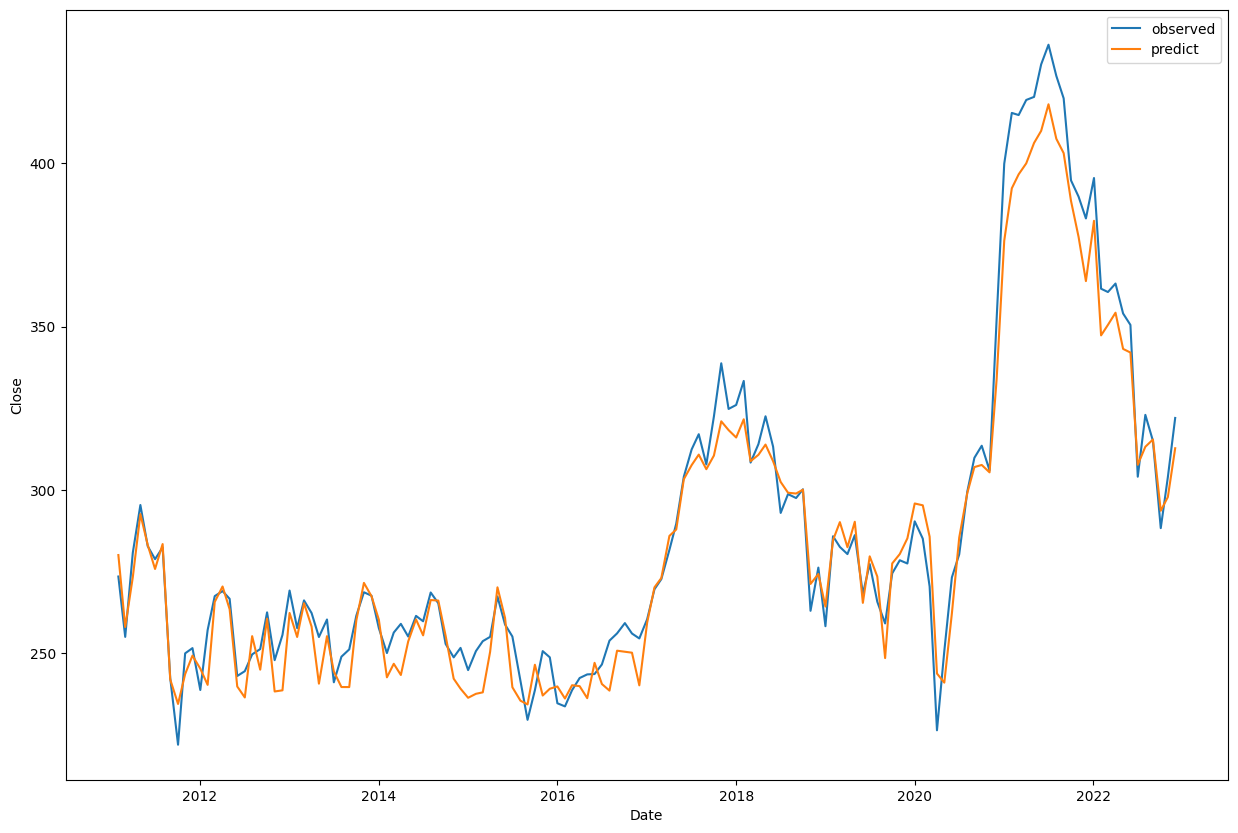

In [50]:
sns.lineplot(visual_t, x = 'Date', y = 'Close', label='observed')
sns.lineplot(visual_y, x = 'Date', y = 'Close', label='predict')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

## 변동률 분포 확인 후, 그룹 별로 분류

In [ ]:
# 변동률 계산
df['Fluctuation'] = df[['Close']].pct_change()

In [ ]:
# 변동률 백분율로 변환
df['Fluctuation(%)'] = df['Fluctuation'] * 100

In [ ]:
df

In [ ]:
plt.hist(df['Fluctuation(%)'], bins=100)  # 히스토그램 / bins: 상세함 정도
plt.xlabel('Fluctuation(%)')
plt.ylabel('Count')  # 갯수

In [ ]:
cond1 = df['Fluctuation(%)'] < -1
cond2 = (df['Fluctuation(%)'] >= -1) & (df['Fluctuation(%)'] < -0.05)
cond3 = (df['Fluctuation(%)'] >= -0.05) & (df['Fluctuation(%)'] < 0.05)
cond4 = (df['Fluctuation(%)'] >= 0.05) & (df['Fluctuation(%)'] < 1)
cond5 = (df['Fluctuation(%)'] >= 1)

df.loc[cond1, 'Group'] = 'E'
df.loc[cond2, 'Group'] = 'D'
df.loc[cond3, 'Group'] = 'C'
df.loc[cond4, 'Group'] = 'B'
df.loc[cond5, 'Group'] = 'A'

In [ ]:
df['Group'].value_counts()

In [ ]:
df = df.set_index('Date')  # Date를 인덱스로 지정
df_y = pd.DataFrame(df['Group'].resample('BMS').first())  # y: 달의 첫날(BMS)의 종가로 지정
df = df.reset_index()  # 다시 컬럼으로 변환
df_y = df_y.reset_index()
df_y = df_y.iloc[1:, :]  # 11년 1월을 예측할 데이터가 존재하지 않기 때문에 제외

In [ ]:
x_class_list = []

In [ ]:
for i in range(2011, 2023):
    for j in range(1, 13):
        if j < 9:
            cond = (df['Date'] >= (str(i) + '-' + str(0) + str(j))) & (
                        df['Date'] < (str(i) + '-' + str(0) + str(j + 1)))
            x_class_list.append(df.loc[cond]['Fluctuation(%)'].values[-15:])
        elif j == 9:
            cond = (df['Date'] >= (str(i) + '-' + str(0) + str(j))) & (df['Date'] < (str(i) + '-' + str(j + 1)))
            x_class_list.append(df.loc[cond]['Fluctuation(%)'].values[-15:])
        elif j == 12:
            cond = (df['Date'] >= (str(i) + '-' + str(j))) & (df['Date'] < (str(i + 1) + '-' + str(0) + str(1)))
            x_class_list.append(df.loc[cond]['Fluctuation(%)'].values[-15:])
        else:
            cond = (df['Date'] >= (str(i) + '-' + str(j))) & (df['Date'] < (str(i) + '-' + str(j + 1)))
            x_class_list.append(df.loc[cond]['Fluctuation(%)'].values[-15:])

In [ ]:
x_class_list

In [ ]:
X_class = np.array(x_class_list)

In [ ]:
df_y

## y One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False)
# ohe_y = pd.DataFrame(ohe.fit_transform(df_y[['Group']]), columns = ohe.get_feature_names())
ohe_y = ohe.fit_transform(df_y[['Group']])
ohe_y

In [ ]:
X_class = X_class[:-1, :]  # 2022년 12월 데이터 제거

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_class, ohe_y, random_state = 42)

In [ ]:
x = layers.Input(shape = (X_class.shape[1], 1))
lstm = layers.LSTM(64, return_sequences = True)(x)
lstm = layers.LSTM(32)(lstm)  # 성능을 높이기 위해 lstm층 추가
dense = layers.Dense(32)(lstm)
norm = layers.BatchNormalization()(dense)
relu = layers.ReLU()(norm)
y = layers.Dense(5, activation = 'softmax')(relu)
model = models.Model(x, y)

model.compile('adam', 'categorical_crossentropy')

In [ ]:
# EarlyStopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=70)

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 1000, validation_data = [X_test, y_test], batch_size = 16, verbose = 1, callbacks = es)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis = 1)  
# argmax: 제일 큰 값의 index를 뽑아오기 = OneHotEncoding을 하기 전으로 만들어준 것과 같음

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)

In [ ]:
# 예측값과 실제값을 비교하여 잘 분류 되었는지 확인하기
print(classification_report(np.argmax(y_train, axis = 1), y_train_pred))

In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), y_test_pred))

# 결과 똥이야ㅠㅠ (수정 필요!!!)

## 1달 데이터로 미래의 1달 예측하기
- X_month: 15일치 142개 데이터(11년 1월~22년 11월)  
- y_month: 15일치 142개 데이터(11년 2월~22년 12월)

In [ ]:
# 11년 1월 ~ 22년 12월 (한달(15일) 기준으로 묶여있음)
X

In [ ]:
# X에서 마지막 한달 데이터 제외 (11년 1월 ~ 22년 11월)
X_month = X[:-1, :]

In [ ]:
# X에서 첫 한달 데이터 제외 (11년 2월 ~ 22년 12월)
y_month = X[1:, :]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_month, y_month, random_state = 42)

In [ ]:
# LSTM
x = layers.Input(shape = (X_train.shape[1], 1))
lstm = layers.LSTM(64)(x)
dense = layers.Dense(32)(lstm)
norm = layers.BatchNormalization()(dense)
relu = layers.ReLU()(norm)
y = layers.Dense(15)(relu) # 15일치를 예측해야 되니까 출력층을 15개로 지정

model = models.Model(x, y)
model.compile('adam', 'mean_squared_error')

In [ ]:
# EarlyStopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 1000, validation_data = [X_test, y_test], batch_size = 16, verbose = 1, callbacks = es)

In [ ]:
# X_train으로 y_train 예측
y_train_predict = model.predict(X_train)

In [ ]:
# y_train 결정 계수
print(r2_score(y_train, y_train_predict))

In [ ]:
# mean_squared_error: 잔차의 제곱의 평균 = 잔차가 큰 데이터를 더 큰 패널티를 주는 것

# √mean_squared_error: 루트를 씌워주는 이유는 제곱을 지워주기 위해서
print(math.sqrt(mean_squared_error(y_train, y_train_predict)))  # sqrt: 루트

In [ ]:
# X_test으로 y_test 예측
y_test_predict = model.predict(y_test)

In [ ]:
# y_test 결정 계수
print(r2_score(y_test, y_test_predict))

In [ ]:
# mean_squared_error: 잔차의 제곱의 평균 = 잔차가 큰 데이터를 더 큰 패널티를 주는 것

# √mean_squared_error: 루트를 씌워주는 이유는 제곱을 지워주기 위해서
print(math.sqrt(mean_squared_error(y_test, y_test_predict)))  # sqrt: 루트

In [ ]:
# 전체 데이터 (11년 1월 ~ 22년 11월) 예측
visual_predict = model.predict(X[:-1,:].reshape(143, 15, 1))

In [ ]:
# 컬럼명이 Close인 빈 데이터 프레임 만들기
# visual_y: 예측값을 넣을 데이터 프레임
visual_y = pd.DataFrame(columns = ['Close'])

In [ ]:
# 예측값을 visual_y 데이터 프레임에 넣어주기
for i in range(len(visual_predict.reshape(-1))) :
    visual_y.loc[i] = visual_predict.reshape(-1)[i]

In [ ]:
visual_y

여기까지 매 달 마지막 15일 예측 완료

In [ ]:
# 빈 데이터 프레임 만들기
# visual_t: 실제값을 넣을 데이터 프레임
visual_t = pd.DataFrame()

In [ ]:
# 실제값을 visual_t 데이터 프레임에 넣어주기
for i in range(2011, 2023):
    for j in range(1, 13):
        if j < 9:
            cond = (df['Date'] >= (str(i) + '-' + str(0) + str(j))) & (
                        df['Date'] < (str(i) + '-' + str(0) + str(j + 1)))
            visual_t = pd.concat([visual_t, pd.DataFrame(df.loc[cond][['Date', 'Close']][-15:])])
        elif j == 9:
            cond = (df['Date'] >= (str(i) + '-' + str(0) + str(j))) & (df['Date'] < (str(i) + '-' + str(j + 1)))
            visual_t = pd.concat([visual_t, pd.DataFrame(df.loc[cond][['Date', 'Close']][-15:])])
        elif j == 12:
            cond = (df['Date'] >= (str(i) + '-' + str(j))) & (df['Date'] < (str(i + 1) + '-' + str(0) + str(1)))
            visual_t = pd.concat([visual_t, pd.DataFrame(df.loc[cond][['Date', 'Close']][-15:])])
        else:
            cond = (df['Date'] >= (str(i) + '-' + str(j))) & (df['Date'] < (str(i) + '-' + str(j + 1)))
            visual_t = pd.concat([visual_t, pd.DataFrame(df.loc[cond][['Date', 'Close']][-15:])])

In [ ]:
# 11년 1월 실제값 제거하기
visual_t = visual_t[15:]
visual_t.reset_index(drop = True, inplace = True)

In [ ]:
# visual_y에 Date 붙여주기
visual_y = pd.concat([visual_y, visual_t['Date']], axis = 1)

In [ ]:
sns.lineplot(visual_t, x = 'Date', y = 'Close', label='observed')
sns.lineplot(visual_y, x = 'Date', y = 'Close', label='predict')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

# 끝!! 고생했서~~